In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('dts.csv')

df = df.drop(columns=['Price'])

print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09      23086.80050  
1                          3.09      40173.07217  
2                          5.13      36882.15940  
3                          3.26      34310.24283  
4                          4.23      26354.10947  


In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(df)

df['Cluster'] = kmeans.labels_

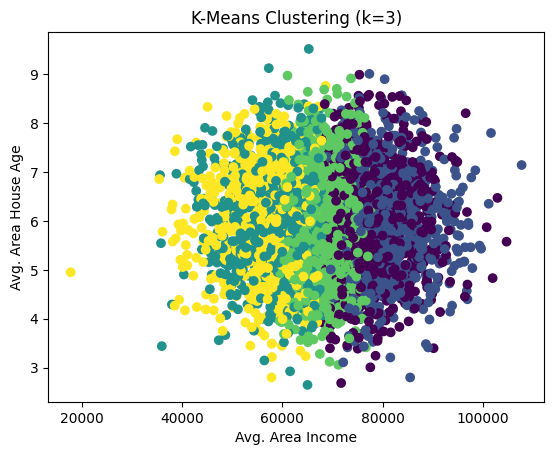

In [8]:
plt.scatter(df['Avg. Area Income'], df['Avg. Area House Age'], c=df['Cluster'], cmap='viridis')

plt.xlabel('Avg. Area Income')
plt.ylabel('Avg. Area House Age')
plt.title('K-Means Clustering (k=3)')
plt.show()

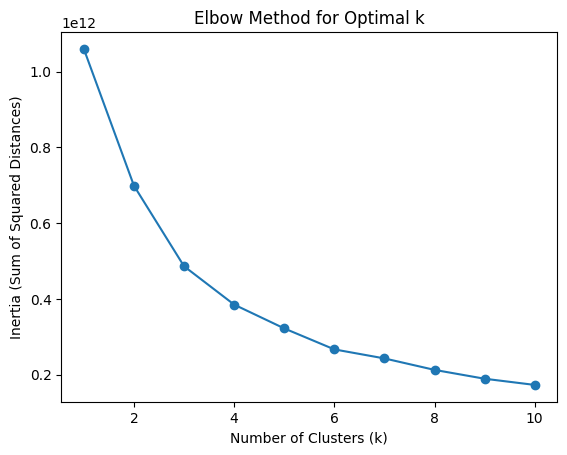

In [9]:
inertia = []
k_range = range(1, 11) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.show()